In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def izracunajA(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*A0 - a*B0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*A0 + a*B0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [3]:
def izracunajB(a, b, A0, B0, t):
    return ((math.sqrt(a*b)*B0 - b*A0)/(2*math.sqrt(a*b))*(math.e**(math.sqrt(a*b)*t))) + ((math.sqrt(a*b)*B0 + b*A0)/(2*math.sqrt(a*b))*(math.e**(-math.sqrt(a*b)*t)))

In [4]:
def odrediTrenutakPobede(a, b, A0, B0):
    for i in list(odrediInterval(0, 100, 0.01)):
        if izracunajA(a, b, A0, B0, i) <= 0 or izracunajB(a, b, A0, B0, i) <= 0:
            return i-0.00001
    return i

In [5]:
def odrediInterval(pocetak, kraj, korak):
    interval = []
    while pocetak < kraj:
        interval.append(pocetak)
        pocetak += korak
    return interval

In [6]:
def simulirajBitku(a, b, A0, B0):
    trenutakPobede = odrediTrenutakPobede(a, b, A0, B0)
    t = np.array(list(odrediInterval(0, trenutakPobede, 0.001)))
    A = izracunajA(a, b, A0, B0, t)
    B = izracunajB(a, b, A0, B0, t)
    
    plt.plot(t, A, label='Vojska A')
    plt.plot(t, B, label='Vojska B')

    plt.legend(loc='upper right')
    plt.xlabel('Vreme t')
    plt.ylabel('brojnost vojske')

    bottom, top = plt.ylim()
    plt.show()

    if (b*A0**2 > a*B0**2):
        print("Pobedjuje A!")
    elif (b*A0**2 < a*B0**2):
        print("Pobedjuje B!")
    else:
        print("Neodlucna bitka!")

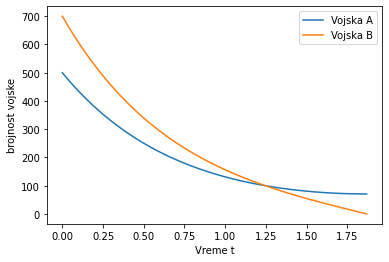

Pobedjuje A!


In [7]:
a = 1
b = 2
A0 = 500
B0 = 700
simulirajBitku(a, b, A0, B0)

Sledeca funkcija ispituje ko pobedjuje u zavisnosti od ubojitosti - mi joj dajemo brojnost naste i protivnicke vojske, a ona nam vraca predvidjanje pobede u zavisnosti od mogucih koeficijenata ubojitosti

In [8]:
def odrediPobednika(a, b, A0, B0):
    if (b*A0**2 > a*B0**2):
        return "A"
    elif (b*A0**2 < a*B0**2):
        return "B"
    else:
        return "D"

def simulirajBitku2(A0, B0):
    N = 50
    r = np.array(list(range(N)))
    pobednici = np.zeros((N, N))
    
# za svaki x y nadjemo ko je pobedio
# onaj ko je pobedio -> koord idu u odg niz
# nasa ubojitost b
    for x in r:
        # protivnicka ubojitost a
        for y in r:
            if x==0 or y==0:
                continue
            w = odrediPobednika(y, x, A0, B0)
            if (w == "A"):
                # winnerA[x] = y
                pobednici[y][x] = 1
                # winnerA[x].append(y)
            elif (w == "B"):
                # winnerB[x] = y
                pobednici[y][x] = -1
            # else:
                # drawn[x] = y
    
    noviPobednici = np.delete(pobednici, 0, 0)
    noviPobednici = np.delete(noviPobednici, 0, 1)

    plt.imshow(noviPobednici)
    plt.xlabel('Ubojitost vojske A')
    plt.ylabel('Ubojitost vojske B')

    plt.colorbar()
    plt.show()

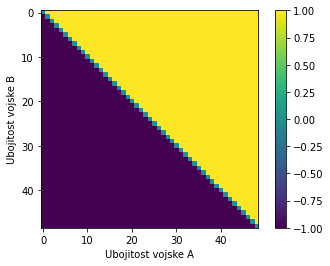

In [9]:
simulirajBitku2(500, 500)

Ljubicasta oznacava pobedu protivnika (vojske B), zuta nasu pobedu (vojske A) a ova zelenkasta je nereseno

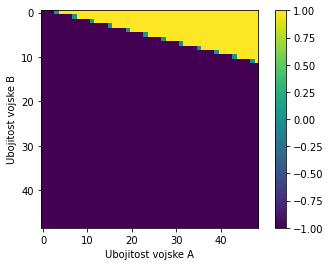

In [10]:
simulirajBitku2(500, 1000)